# Fast gradient algorithm

This is a simple whitebox proof of concept implementation of Ian Goodfellows Fast Gradient algorithm.

White box because I have access to the learned model hence the true gradients. For MNIST it's not too hard to train a substitute model and get it working. 

In [1]:
from tensorflow.examples.tutorials.mnist import input_data   
import numpy as np
from sklearn.metrics import accuracy_score

In [2]:
from model import ImageClassifier
from jack import Jack

In [3]:
# Import data as tensors                                                                                                                               
mnist = input_data.read_data_sets("./MNIST_data/",                                                                                                     
                                  one_hot=True)                                                                                                        

# Train a classifier                                                                                                                                   
data = mnist.train.images                                                                                                                              
labels = mnist.train.labels                                                                                                                            
im = ImageClassifier( data,                                                                                                                            
                      labels,                                                                                                                          
                      len(data[0]),                                                                                                                    
                      10)   

Extracting ./MNIST_data/train-images-idx3-ubyte.gz
Extracting ./MNIST_data/train-labels-idx1-ubyte.gz
Extracting ./MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ./MNIST_data/t10k-labels-idx1-ubyte.gz
Tensor("gradients_1/MatMul_grad/MatMul:0", shape=(?, 784), dtype=float32)


In [4]:
im.train(epochs=5000)        

0 training_accuracy: 0.44685454545454545

500 training_accuracy: 0.8934909090909091

1000 training_accuracy: 0.9081818181818182

1500 training_accuracy: 0.9158

2000 training_accuracy: 0.9186363636363636

2500 training_accuracy: 0.9199818181818182

3000 training_accuracy: 0.9233636363636364

3500 training_accuracy: 0.9248909090909091

4000 training_accuracy: 0.925

4500 training_accuracy: 0.9275454545454546

Training finished


# Validation error

Note the model can be improved to get better accuracy but that's not the point of this exercise.

In [5]:
y_truth =  [np.argmax(i) for i in mnist.test.labels]                                                                                                   
y_pred =  [np.argmax(i) for i in im.oracle(mnist.test.images[:])]                                                                                      
print('Accuracy on validation data: {}\n'.format(accuracy_score(y_truth, y_pred)))  

Accuracy on validation data: 0.9248



In [11]:
j  = Jack()                                                                                                                                            
fake_labels = np.zeros((mnist.test.labels.shape))                                                                                                      
for i,p in enumerate(y_pred):                                                                                                                          
    fake_labels[i, p] = 1                                                                                                                              

# these our the bad ones                                                                                                                               
pirates = j.turn_em_into_a_pirate(mnist.test.images,                                                                                                   
                                  fake_labels,                                                                                                         
                                  im,                                                                                                                  
                                  eps=0.04,                                                                                                            
                                  num_test_images = 'all')


In [12]:
y_bad   = [np.argmax(i) for i in im.oracle(pirates)]                                                                                                   

s = 'Noiseless accuracy: {} Jacked Accuracy: {}\n'
print(s.format(accuracy_score(y_truth, y_pred),                                                                                  
               accuracy_score(y_truth, y_bad)))      

Noiseless accuracy: 0.9248 Jacked Accuracy: 0.235



# Comparing 10 r

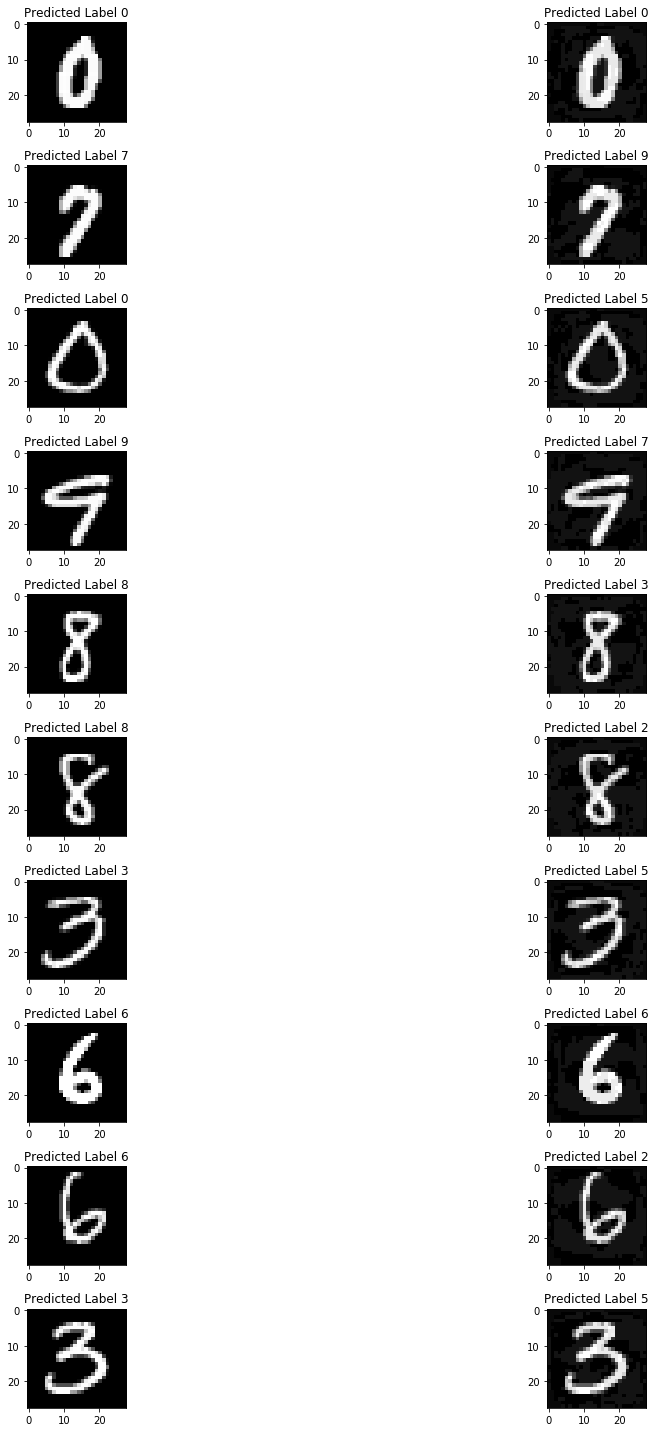

In [13]:
import matplotlib.pyplot as plt

f, axarr = plt.subplots(10, 2,figsize=(20,20))
for i in range(10):
    index = np.random.randint(len(pirates))
    pixels = np.array(mnist.test.images[index])
    pixels = pixels.reshape((28, 28))
    axarr[i,0].imshow(pixels, cmap='gray')
    axarr[i,0].set_title('Predicted Label {}'.format(y_pred[index]))
    
    pixels = np.array(pirates[index])
    pixels = pixels.reshape((28, 28)) 
    axarr[i,1].set_title('Predicted Label {}'.format(y_bad[index]))
    axarr[i,1].imshow(pixels, cmap='gray')

plt.tight_layout()
